In [ ]:
#importing all the suitable libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

In [ ]:
#Creating the dataframe
train=pd.read_csv('train.csv')

In [ ]:
#printing the contents
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,220,120,RL,43.0,3010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,167240
1,230,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,192500
2,386,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,192000
3,444,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,172500
4,466,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,178740


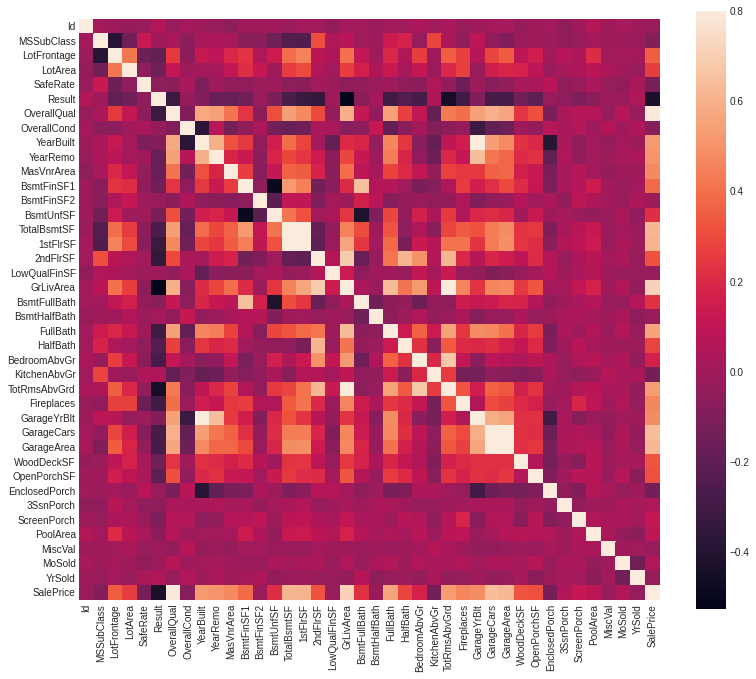

In [ ]:
#correlation matrix
cormat = train.corr()
f, ax = plt.subplots(figsize=(13, 11))
sns.heatmap(cormat, vmax=.8, square=True);

In [ ]:
#Categorising Neighborhood based on the sales price average
train[["Neighborhood","SalePrice","GrLivArea"]].groupby(by="Neighborhood",as_index=False).mean().sort_values(by="Neighborhood",ascending=True)

,Neighborhood,SalePrice,GrLivArea
0,Blmngtn,194870.882353,1427.941176
1,Blueste,137500.000000,1392.500000
2,BrDale,104493.750000,1143.187500
3,BrkSide,124834.051724,1203.068966
4,ClearCr,212565.428571,1788.107143
5,CollgCr,197965.773333,1480.500000
6,Crawfor,210624.725490,1791.607843
7,Edwards,128219.700000,1340.040000
8,Gilbert,192854.506329,1641.316456
9,IDOTRR,100123.783784,1142.297297


In [ ]:
#Categorising Neighborhood based on the Living Area average
train[["Neighborhood","GrLivArea"]].groupby(by="Neighborhood",as_index=False).mean().sort_values(by="Neighborhood",ascending=True)

,Neighborhood,GrLivArea
0,Blmngtn,1427.941176
1,Blueste,1392.500000
2,BrDale,1143.187500
3,BrkSide,1203.068966
4,ClearCr,1788.107143
5,CollgCr,1480.500000
6,Crawfor,1791.607843
7,Edwards,1340.040000
8,Gilbert,1641.316456
9,IDOTRR,1142.297297


In [ ]:
train['Result']=0

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,220,120,RL,43.0,3010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,167240
1,230,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,192500
2,386,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,192000
3,444,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,172500
4,466,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,178740


In [ ]:
train['nn']=0

In [ ]:
train.loc[train['Neighborhood'].str.contains('Blmngtn'), 'nn'] =0
train.loc[train['Neighborhood'].str.contains('Blueste'), 'nn'] =1
train.loc[train['Neighborhood'].str.contains('BrDale'), 'nn'] = 2
train.loc[train['Neighborhood'].str.contains('BrkSide'), 'nn'] = 3
train.loc[train['Neighborhood'].str.contains('ClearCr'), 'nn'] = 4
train.loc[train['Neighborhood'].str.contains('CollgCr'), 'nn'] = 5
train.loc[train['Neighborhood'].str.contains('Crawfor'), 'nn'] = 6
train.loc[train['Neighborhood'].str.contains('Edwards'), 'nn'] = 7
train.loc[train['Neighborhood'].str.contains('Gilbert'), 'nn'] = 8
train.loc[train['Neighborhood'].str.contains('IDOTRR'), 'nn'] = 9
train.loc[train['Neighborhood'].str.contains('MeadowV'), 'nn'] = 10
train.loc[train['Neighborhood'].str.contains('Mitchel'), 'nn'] = 11
train.loc[train['Neighborhood'].str.contains('NAmes'), 'nn'] = 12
train.loc[train['Neighborhood'].str.contains('NPkVill'), 'nn'] = 13
train.loc[train['Neighborhood'].str.contains('NWAmes'), 'nn'] = 14
train.loc[train['Neighborhood'].str.contains('NoRidge'), 'nn'] = 15
train.loc[train['Neighborhood'].str.contains('NridgHt'), 'nn'] = 16
train.loc[train['Neighborhood'].str.contains('OldTown'), 'nn'] = 17
train.loc[train['Neighborhood'].str.contains('SWISU'), 'nn'] = 18
train.loc[train['Neighborhood'].str.contains('Sawyer'), 'nn'] = 19
train.loc[train['Neighborhood'].str.contains('SawyerW'), 'nn'] = 20
train.loc[train['Neighborhood'].str.contains('Somerst'), 'nn'] = 21
train.loc[train['Neighborhood'].str.contains('StoneBr'), 'nn'] = 22
train.loc[train['Neighborhood'].str.contains('Timber'), 'nn'] = 23
train.loc[train['Neighborhood'].str.contains('Veenker'), 'nn'] = 24

In [ ]:
train['nn']

0        0
1        0
2        0
3        0
4        0
        ..
1455    24
1456    24
1457    24
1458    24
1459    24
Name: nn, Length: 1460, dtype: int64

In [ ]:
train_0 =train[train.eval('nn==0  and SalePrice > 194870.882353 and GrLivArea >= 1427.941176' )]

In [ ]:
train_0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
5,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,234000,0
7,640,120,RL,53.0,3982,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,New,Partial,264561,0
9,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,215000,0
12,1020,120,RL,43.0,3013,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,213490,0
15,1395,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,New,Partial,246578,0


In [ ]:
train_1=train[train.eval(' nn==1 and SalePrice > 137500.00 and GrLivArea >= 1392.50' )]

In [ ]:
train_1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
17,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000,1


In [ ]:
train_2 = train[train.eval(' nn==2 and SalePrice > 104493.75 and GrLivArea >= 1143.187' )]

In [ ]:
train_2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
19,226,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,COD,Abnorml,112000,2
25,433,160,RM,24.0,1920,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,122500,2
26,501,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,113000,2
29,1030,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,118000,2
30,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2007,WD,Normal,106000,2
32,1292,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2009,WD,Normal,119500,2
33,1335,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,WD,Normal,125000,2


In [ ]:
train_3 = train[train.eval(' nn==3 and SalePrice > 124834.05 and GrLivArea >= 1203.06' )]

In [ ]:
train_3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
39,78,50,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2008,WD,Normal,127000,3
42,185,50,RL,92.0,7438,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2006,WD,Normal,127000,3
44,276,50,RL,55.0,7264,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,205000,3
45,290,70,RL,60.0,8730,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2007,WD,Normal,153575,3
46,329,75,RL,NaN,11888,Pave,Pave,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,214500,3
47,346,50,RL,65.0,6435,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,140200,3
48,362,50,RL,NaN,9144,Pave,Pave,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2008,WD,Normal,145000,3
51,443,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,162900,3
53,498,50,RL,60.0,9120,Pave,Pave,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,6,2008,WD,Normal,184000,3
54,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,159000,3


In [ ]:
train_4 = train[train.eval(' nn==4 and SalePrice > 212565.42 and GrLivArea >= 1788.107' )]

In [ ]:
train_4

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
93,70,50,RL,81.0,15593,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,225000,4
98,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,Shed,500,6,2007,WD,Normal,277000,4
104,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,240000,4
109,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,302000,4
114,849,50,RL,75.0,45600,Pave,NaN,IR2,Bnk,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,240000,4
115,940,70,RL,NaN,24090,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,COD,Normal,244400,4
116,1066,60,RL,80.0,14000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,328000,4


In [ ]:
train_5 = train[train.eval(' nn==5 and SalePrice > 197965.77 and GrLivArea >= 1480.50' )]

In [ ]:
train_5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
121,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
122,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,5
123,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,New,Partial,279500,5
124,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,230000,5
130,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1370,20,RL,48.0,10635,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,232000,5
262,1373,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,274300,5
263,1391,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Normal,235000,5
266,1411,60,RL,79.0,12420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,230000,5


In [ ]:
for i in train_5['Id']:
  print(i)

1
3
14
23
65
95
97
113
139
140
142
144
221
258
259
262
291
302
303
306
338
375
383
436
445
477
479
519
540
605
611
613
684
705
733
753
757
769
777
816
833
872
929
939
964
984
1017
1034
1038
1055
1122
1143
1167
1204
1208
1241
1279
1281
1317
1319
1339
1343
1355
1370
1373
1391
1411
1448


In [ ]:
train_6 = train[train.eval(' nn==6 and SalePrice > 210624.72 and GrLivArea >= 1791.60' )]

In [ ]:
train_6

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
273,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,...,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000,6
274,115,70,RL,61.0,7259,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,7,2007,WD,Normal,259500,6
276,191,70,RL,70.0,10570,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,12,2007,WD,Normal,315000,6
277,219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,311500,6
282,418,70,RL,86.0,22420,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2007,WD,Normal,239000,6
285,504,20,RL,100.0,15602,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,3,2010,WD,Normal,289000,6
287,520,70,RL,53.0,10918,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2009,WD,Normal,234000,6
290,609,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,NaN,0,9,2007,WD,Alloca,359100,6
293,674,20,RL,110.0,14442,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,257500,6
297,908,50,RL,86.0,11500,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,250000,6


In [ ]:
for i in train_6['Id']:
  print(i)

114
115
191
219
418
504
520
609
674
908
1060
1153
1175
1269
1311
1420
1458


In [ ]:
train_7 = train[train.eval(' nn==7 and SalePrice > 128219.70 and GrLivArea >= 1340.04' )]

In [ ]:
train_7

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
325,111,50,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,136900,7
327,146,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,130000,7
330,176,20,RL,84.0,12615,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2007,WD,Normal,243000,7
332,194,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,130000,7
338,293,50,RL,60.0,11409,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2009,WD,Normal,131000,7
341,363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500,7
354,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,7
359,564,50,RL,66.0,21780,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2008,WD,Normal,185000,7
361,608,20,RL,78.0,7800,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,8,2006,WD,Normal,225000,7
366,660,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2009,WD,Normal,167000,7


In [ ]:
for i in train_7['Id']:
  print(i)

111
146
176
194
293
363
524
564
608
660
724
725
888
922
943
1046
1054
1074
1089
1152
1169
1255
1274
1299
1305
1424


In [ ]:
train_8 = train[train.eval(' nn==8 and SalePrice > 192854.50 and GrLivArea >= 1641.31' )]

In [ ]:
train_8

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
428,132,60,RL,NaN,12224,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,244000,8
429,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,222500,8
430,160,60,RL,134.0,19378,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,3,2006,New,Partial,320000,8
433,222,60,RL,NaN,8068,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2009,ConLI,Normal,200000,8
434,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,216500,8
435,256,60,RL,66.0,8738,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Normal,230000,8
448,448,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,199900,8
455,666,60,RL,106.0,11194,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,230500,8
457,738,60,RL,72.0,10463,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,239900,8
458,747,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2009,WD,Normal,236000,8


In [ ]:
for i in train_8['Id']:
  print(i)

132
148
160
222
235
256
448
666
738
747
795
823
904
930
942
1108
1129
1197
1301
1389


In [ ]:
train_9 = train[train.eval(' nn==9 and SalePrice > 100123.78 and GrLivArea >= 1142.29' )]

In [ ]:
train_9

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
506,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,169500,9
507,109,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,115000,9
511,297,50,RM,75.0,13710,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2007,WD,Normal,152000,9
515,366,70,RM,59.0,10690,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,147000,9
517,449,50,RM,50.0,8600,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,119500,9
519,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,...,NaN,NaN,NaN,0,9,2006,COD,Normal,108000,9
520,602,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,12,2007,WD,Normal,141000,9
521,654,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2008,WD,Normal,135000,9
523,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776,9
524,730,30,RM,52.0,6240,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2009,WD,Normal,103000,9


In [ ]:
for i in train_9['Id']:
  print(i)

105
109
297
366
449
558
602
654
712
730
802
1097
1334
1386


In [ ]:
train_10 = train[train.eval(' nn==10 and SalePrice > 98576.47 and GrLivArea >= 1058.94' )]

In [ ]:
train_10

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
538,24,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,129900,10
541,358,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,8,2007,WD,Normal,134000,10
544,491,160,RM,NaN,2665,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,115000,10
551,1069,160,RM,42.0,3964,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,6,2006,WD,Normal,151400,10
553,1368,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,127000,10


In [ ]:
for i in train_10['Id']:
  print(i)

24
358
491
1069
1368


In [ ]:
train_11 = train[train.eval(' nn==11 and SalePrice > 156270.122 and GrLivArea >=  1294.20' )]

In [ ]:
train_11

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
556,47,50,RL,48.0,12822,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2009,WD,Abnorml,239686,11
559,138,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Family,171000,11
563,277,20,RL,129.0,9196,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,201000,11
566,392,60,RL,71.0,12209,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000,11
567,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300,11
569,455,90,RL,63.0,9297,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Family,188000,11
573,562,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,11
576,768,50,RL,75.0,12508,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,1300,7,2008,WD,Normal,160000,11
581,818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2008,WD,Normal,271000,11
586,954,60,RL,NaN,11075,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,400,9,2008,WD,Normal,172000,11


In [ ]:
for i in train_11['Id']:
  print(i)

47
138
277
392
421
455
562
768
818
954
1009
1139
1191


In [ ]:
train_12 = train[train.eval(' nn==12 and SalePrice > 145847.08 and GrLivArea >= 1310.311' )]

In [ ]:
train_12

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
608,29,20,RL,47.0,16321,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2006,WD,Normal,207500,12
609,34,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,165500,12
612,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000,12
615,56,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2008,WD,Normal,180500,12
616,67,20,RL,NaN,19900,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2010,WD,Normal,180000,12
617,71,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,244000,12
620,81,60,RL,100.0,13000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,193500,12
626,129,60,RL,69.0,7590,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,155000,12
628,131,60,RL,88.0,14200,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,5,2006,WD,Normal,226000,12
629,133,20,RL,75.0,7388,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2007,WD,Normal,150750,12


In [ ]:
for i in train_12['Id']:
  print(i)

29
34
41
56
67
71
81
129
131
133
143
172
174
192
198
261
287
295
325
348
367
368
398
447
468
511
581
606
628
630
643
649
814
831
834
854
889
890
911
920
935
993
1007
1053
1068
1155
1251
1265
1316
1321
1351
1352
1372
1382
1436


In [ ]:
train_13 = train[train.eval(' nn==13 and SalePrice > 142694.44 and GrLivArea >= 1253.00' )]

In [ ]:
train_13

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
871,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,148500,13
872,505,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,147000,13
874,676,160,RL,24.0,2289,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2009,WD,Normal,148500,13
875,963,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2007,WD,Normal,155000,13
876,1161,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2010,WD,Normal,146000,13


In [ ]:
train_14 = train[train.eval(' nn==14 and SalePrice > 189050.06 and GrLivArea >= 1727.780' )]

In [ ]:
train_14

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
956,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,14
958,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000,14
961,153,60,RL,NaN,14803,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,6,2006,WD,Normal,190000,14
963,246,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,241500,14
965,294,60,RL,NaN,16659,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2006,WD,Normal,235000,14
967,317,60,RL,94.0,13005,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdPrv,NaN,0,8,2009,WD,Normal,260000,14
973,472,60,RL,92.0,11952,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2007,WD,Normal,190000,14
977,546,50,RL,NaN,13837,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Normal,229000,14
979,622,60,RL,90.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,240000,14
983,661,60,RL,NaN,12384,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2007,WD,Normal,197900,14


In [ ]:
train_15 = train[train.eval(' nn==15 and SalePrice > 335295.21 and GrLivArea >= 2508.85' )]

In [ ]:
train_15

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
832,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,403000,15
838,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,430000,15
846,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,15
852,982,60,RL,98.0,12203,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,336000,15
857,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,625000,15
859,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,15
866,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,WD,Normal,410000,15
867,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2007,WD,Normal,466500,15


In [ ]:
train_16 = train[train.eval(' nn==16 and SalePrice > 316270.62 and GrLivArea >= 1915.94' )]

In [ ]:
train_16

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
879,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,345000,16
880,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,New,Partial,325300,16
887,66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,317000,16
889,162,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2008,WD,Normal,412500,16
891,168,60,RL,86.0,10562,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2007,New,Partial,325624,16
893,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,386250,16
895,279,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,New,Partial,415298,16
897,310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,360000,16
898,321,60,RL,111.0,16259,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,New,Partial,342643,16
899,322,60,RL,99.0,12099,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,354000,16


In [ ]:
train_17 = train[train.eval(' nn==17 and SalePrice > 128225.30 and GrLivArea >= 1479.72' )]

In [ ]:
train_17

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
1029,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,17
1031,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,...,NaN,GdPrv,NaN,0,4,2010,WD,Normal,140000,17
1035,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2007,WD,Normal,133900,17
1041,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,152000,17
1044,184,50,RM,63.0,11426,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,200000,17
1045,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000,17
1046,188,50,RL,60.0,10410,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,8,2009,WD,Normal,135000,17
1053,247,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,137000,17
1057,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,295000,17
1059,315,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2006,WD,Normal,178000,17


In [ ]:
train_18 = train[train.eval(' nn==18 and SalePrice > 142591.36 and GrLivArea >= 1801.24' )]

In [ ]:
train_18

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
1386,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,7,2008,WD,Normal,179500,18
1394,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000,18
1401,1031,190,RH,NaN,7082,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,160000,18
1402,1032,75,RL,102.0,15863,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2009,WD,Normal,197000,18
1407,1285,50,RL,50.0,9638,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,WD,Normal,169000,18
1408,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,189000,18


In [ ]:
train_19 = train[train.eval(' nn==19 and SalePrice > 136793.13 and GrLivArea >= 1215.13' )]

In [ ]:
train_19

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
1146,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350,19
1150,135,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,7,2006,WD,Normal,180000,19
1152,178,50,RL,NaN,13650,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,172500,19
1153,207,20,RL,40.0,13673,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2007,WD,Normal,143900,19
1158,406,20,RL,NaN,9991,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,6,2009,WD,Normal,150000,19
1159,417,60,RL,74.0,7844,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2006,WD,Normal,149500,19
1166,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Abnorml,164500,19
1170,669,20,RL,NaN,14175,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,168000,19
1178,744,80,RL,70.0,12886,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,175000,19
1179,758,60,RL,NaN,11616,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdPrv,NaN,0,4,2010,WD,Abnorml,158900,19


In [ ]:
train_20 = train[train.eval(' nn==20 and SalePrice > 186555.79 and GrLivArea >= 1595.01' )]

In [ ]:
train_20

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
1221,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,320000,20
1225,209,60,RL,NaN,14364,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,4,2007,WD,Normal,277000,20
1226,238,60,RL,NaN,9453,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2010,WD,Normal,194500,20
1228,245,60,RL,NaN,8880,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,205000,20
1230,281,60,RL,82.0,11287,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2007,WD,Normal,228500,20
1232,307,60,RL,116.0,13474,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,225000,20
1233,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000,20
1237,415,60,RL,59.0,11228,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,228000,20
1238,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,NaN,NaN,NaN,0,8,2009,WD,Normal,275000,20
1239,470,60,RL,76.0,9291,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,187000,20


In [ ]:
train_21 = train[train.eval(' nn==21 and SalePrice > 225379.83 and GrLivArea >= 1596.65' )]

In [ ]:
train_21

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
1275,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,21
1276,48,20,FV,84.0,11096,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2007,WD,Normal,249700,21
1280,106,60,FV,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2008,WD,Normal,250000,21
1282,159,60,FV,100.0,12552,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2010,WD,Normal,254900,21
1284,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2007,New,Partial,311872,21
1285,213,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,New,Partial,252678,21
1288,271,60,FV,84.0,10728,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2006,New,Partial,266000,21
1292,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,239000,21
1293,318,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2007,WD,Normal,270000,21
1294,378,60,FV,102.0,11143,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2007,WD,Normal,340000,21


In [ ]:
train_22 = train[train.eval(' nn==22 and SalePrice > 310499.00 and GrLivArea >= 1879.08' )]

In [ ]:
train_22

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
1361,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,NaN,0,10,2006,New,Partial,438780,22
1363,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,New,Partial,501837,22
1365,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,7,2007,WD,Normal,377426,22
1369,567,60,RL,77.0,11198,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,325000,22
1371,679,20,RL,80.0,11844,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,New,Partial,372500,22
1374,703,60,RL,82.0,12438,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,361919,22
1379,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,538000,22
1381,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,556581,22


In [ ]:
train_23 = train[train.eval(' nn==23 and SalePrice > 242247.44 and GrLivArea >= 1749.36' )]

In [ ]:
train_23

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
1413,158,60,RL,92.0,12003,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,New,Partial,269500,23
1416,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,375000,23
1422,541,20,RL,85.0,14601,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2009,WD,Normal,315000,23
1424,586,20,RL,88.0,11443,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2006,New,Partial,369900,23
1425,620,60,RL,85.0,12244,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2008,WD,Normal,305000,23
1426,693,60,RL,42.0,26178,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,335000,23
1428,701,20,RL,85.0,14331,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,312500,23
1436,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,COD,Abnorml,287000,23
1439,1181,60,RL,NaN,11170,Pave,NaN,IR2,Lvl,AllPub,...,NaN,GdPrv,NaN,0,4,2006,WD,Normal,250000,23
1442,1268,20,RL,89.0,13214,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,378500,23


In [ ]:
train_24 = train[train.eval(' nn==24 and SalePrice > 238772.72 and GrLivArea >= 1539.63' )]

In [ ]:
train_24

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nn
1450,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,24
1452,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,Con,Normal,324000,24
1459,1254,60,RL,NaN,17542,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,7,2007,WD,Normal,294000,24


In [ ]:
for i in train:
  print(i)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
SafeRate
Result
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemo
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
nn


In [ ]:
features = ['OverallQual','GrLivArea','TotalBsmtSF','TotRmsAbvGrd','1stFlrSF','nn']
X = train[features]
y = train['SalePrice']


In [ ]:
X.describe()

,OverallQual,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,1stFlrSF,nn
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1057.429452,6.517808,1162.626712,12.251370
std,1.382997,525.480383,438.705324,1.625393,386.587738,6.013735
min,1.000000,334.000000,0.000000,2.000000,334.000000,0.000000
25%,5.000000,1129.500000,795.750000,5.000000,882.000000,7.000000
50%,6.000000,1464.000000,991.500000,6.000000,1087.000000,12.000000
75%,7.000000,1776.750000,1298.250000,7.000000,1391.250000,17.000000
max,10.000000,5642.000000,6110.000000,14.000000,4692.000000,24.000000


In [ ]:
X.head()

,OverallQual,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,1stFlrSF,nn
0,7,1248,1248,5,1248,0
1,7,1555,1373,7,1555,0
2,8,1269,1256,6,1269,0
3,7,1258,1258,6,1258,0
4,7,1414,1375,6,1414,0


In [ ]:

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0, max_depth=11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)


In [ ]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, random_state=0)

In [ ]:
model.score(X_test,y_test)

0.7678773888984189

In [ ]:
pred_tr = model.predict(X_train)

In [ ]:
from sklearn.metrics import explained_variance_score
decision_score = model.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr, y_train)

In [ ]:
print("Decision tree accuracy score: ", round(model.score(X_test,y_test)*100))

Decision tree accuracy score:  77


In [ ]:
pred_tr_2 = model.predict(X_test)

In [ ]:
expl = explained_variance_score(pred_tr_2,y_test)
print("Explained Variance Score: ",expl)

Explained Variance Score:  0.7505796800600554


In [ ]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
multilr = LinearRegression()
multilr.fit(X_train,y_train)
multilr_score = multilr.score(X_test,y_test)
pred_multilr = multilr.predict(X_test)
expl_multilr = explained_variance_score(pred_multilr,y_test)

In [ ]:
print("Multiple Linear Regression Model Score is ",round(multilr.score(X_test,y_test)*100))

Multiple Linear Regression Model Score is  76


In [ ]:
print("Explained Variance Score: ",expl_multilr)

Explained Variance Score:  0.6799131232537351


In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
randomf_regressor.fit(X_train,y_train)
randomf_regressor.score(X_test,y_test)
randomf_pred =randomf_regressor.predict(X_test)
randomf_score=randomf_regressor.score(X_test,y_test)
expl_randomf = explained_variance_score(randomf_pred,y_test)

In [ ]:
print("Random Forest Regression Model Accuracy Score is ",round(randomf_regressor.score(X_test,y_test)*100))

Random Forest Regression Model Accuracy Score is  84


In [ ]:
print("Explained Variance Score: ",expl_randomf)

Explained Variance Score:  0.8045423433731832


In [ ]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[multilr_score,decision_score,randomf_score],
                            'Explained Variance Score':[expl_multilr,expl_tr,expl_randomf]
                           })
models_score.sort_values(by='Score',ascending=False)

,Model,Score,Explained Variance Score
2,Random forest Regression,0.837808,0.804542
1,Decision Tree,0.767877,0.971522
0,Multiple Linear Regression,0.759810,0.679913
